In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir("../input"))

['digit-recognizer']


In [2]:
import numpy as np

# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [3]:
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7f313f69d678>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In order to learn, compare numpy and tensor

np.ones() = torch.ones()

np.random.rand() = torch.rand()

In [4]:
print("Numpy {}\n".format(np.ones((2,3))))

# pytorch ones
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [5]:
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.5497742  0.22974962]
 [0.62633798 0.91793813]]

tensor([[0.5498, 0.2297],
        [0.6263, 0.9179]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.5497742  0.22974962]
 [0.62633798 0.91793813]]



Basic Math with Pytorch
* Resize: view()
* a and b are tensor.
* Addition: torch.add(a,b) = a + b
* Subtraction: a.sub(b) = a - b
* Element wise multiplication: torch.mul(a,b) = a * b
* Element wise division: torch.div(a,b) = a / b
* Mean: a.mean()
* Standart Deviation (std): a.std()

In [6]:
# create tensor 
tensor = torch.ones(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# Standart deviation (std)
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


**Variable**
* Difference between variables and tensor is variable accumulates gradients.
* We can make math operations with variables, too.
* In order to make backward propagation we need variables

In [7]:
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

# Linear Regression

In [8]:
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

In [9]:
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

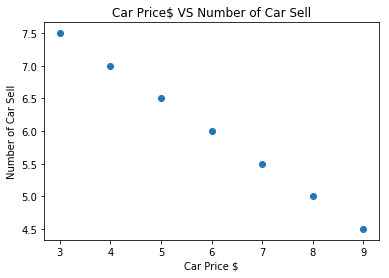

In [10]:
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

**Steps of Linear Regression**
* create LinearRegression class
* define model from this LinearRegression class
* MSE: Mean squared error
* Optimization (SGD:stochastic gradient descent)
* Backpropagation
* Prediction

In [11]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

epoch 0, loss 20.688703536987305
epoch 200, loss 1.8049135208129883
epoch 400, loss 0.37634024024009705
epoch 600, loss 0.07847036421298981
epoch 800, loss 0.016362151131033897


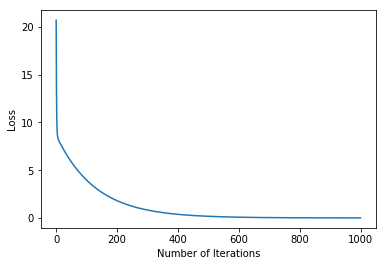

In [12]:
class LinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.linear(x)
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim)
mse = nn.MSELoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

loss_list = []
iteration_number = 1000

for iteration in range(iteration_number):
    optimizer.zero_grad()
    # Forward to get output
    results = model(car_price_tensor)
    loss = mse(results,number_of_car_sell_tensor)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)
    if(iteration % 200 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

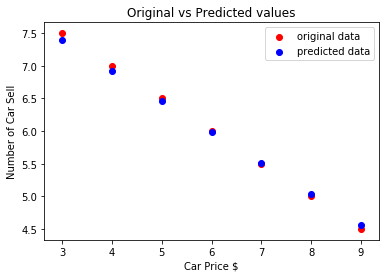

In [13]:
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()


# Logistic Regression

In [14]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd
from sklearn.model_selection import train_test_split

In our example: we have 33600 sample to train and we decide our batch_size is 100. Also we decide epoch is 29(accuracy achieves almost highest value when epoch is 29). Data is trained 29 times. Question is that how many iteration do I need? Lets calculate:
* training data 1 times = training 33600 sample (because data includes 33600 sample)
* But we split our data 336 groups(group_size = batch_size = 100) our data
* Therefore, 1 epoch(training data only once) takes 336 iteration
* We have 29 epoch, so total iterarion is 9744(that is almost 10000 which I used)

In [15]:
train = pd.read_csv(r"../input/digit-recognizer/train.csv",dtype = np.float32)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

In [16]:
class LogisticRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LogisticRegression,self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self,x):
        return self.linear(x)

input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9
model = LogisticRegression(input_dim, output_dim)
error = nn.CrossEntropyLoss()

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {0}  Loss: {1:.2f}  Accuracy: {2:.2f}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.81  Accuracy: 64.00%
Iteration: 1000  Loss: 1.63  Accuracy: 73.00%
Iteration: 1500  Loss: 1.30  Accuracy: 78.00%
Iteration: 2000  Loss: 1.22  Accuracy: 79.00%
Iteration: 2500  Loss: 1.04  Accuracy: 81.00%
Iteration: 3000  Loss: 0.93  Accuracy: 82.00%
Iteration: 3500  Loss: 0.90  Accuracy: 82.00%
Iteration: 4000  Loss: 0.75  Accuracy: 83.00%
Iteration: 4500  Loss: 0.97  Accuracy: 83.00%
Iteration: 5000  Loss: 0.80  Accuracy: 83.00%
Iteration: 5500  Loss: 0.75  Accuracy: 84.00%
Iteration: 6000  Loss: 0.88  Accuracy: 84.00%
Iteration: 6500  Loss: 0.67  Accuracy: 84.00%
Iteration: 7000  Loss: 0.71  Accuracy: 85.00%
Iteration: 7500  Loss: 0.64  Accuracy: 85.00%
Iteration: 8000  Loss: 0.74  Accuracy: 85.00%
Iteration: 8500  Loss: 0.55  Accuracy: 85.00%
Iteration: 9000  Loss: 0.67  Accuracy: 85.00%
Iteration: 9500  Loss: 0.52  Accuracy: 85.00%


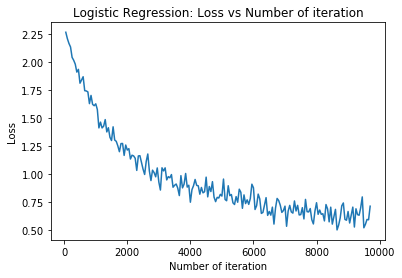

In [18]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

> # Neural Network

In [20]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

In [37]:
class ANNModel(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        super(ANNModel,self).__init__()
        self.fc1 = nn.Linear(input_dim,hidden_dim)
        self.relu = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_dim,hidden_dim)
        self.tanh = nn.Tanh()
        
        self.elu = nn.ELU()
        
        self.fc3 = nn.Linear(hidden_dim,output_dim)
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.elu(out)
        out = self.fc3(out)
        return out

input_dim = 28*28
hidden_dim = 128
output_dim=10

model= ANNModel(input_dim, hidden_dim, output_dim)
loss = nn.CrossEntropyLoss()
lr=0.02
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

In [38]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.item(), accuracy))

Iteration: 500  Loss: 0.7503315806388855  Accuracy: 79 %
Iteration: 1000  Loss: 0.45296791195869446  Accuracy: 87 %
Iteration: 1500  Loss: 0.22987374663352966  Accuracy: 89 %
Iteration: 2000  Loss: 0.3030697703361511  Accuracy: 91 %
Iteration: 2500  Loss: 0.3215818703174591  Accuracy: 92 %
Iteration: 3000  Loss: 0.09594989567995071  Accuracy: 93 %
Iteration: 3500  Loss: 0.22516995668411255  Accuracy: 93 %
Iteration: 4000  Loss: 0.04939859360456467  Accuracy: 94 %
Iteration: 4500  Loss: 0.2949773967266083  Accuracy: 94 %
Iteration: 5000  Loss: 0.09407578408718109  Accuracy: 95 %
Iteration: 5500  Loss: 0.20234951376914978  Accuracy: 95 %
Iteration: 6000  Loss: 0.17459891736507416  Accuracy: 95 %
Iteration: 6500  Loss: 0.07528933137655258  Accuracy: 95 %
Iteration: 7000  Loss: 0.10061337798833847  Accuracy: 96 %
Iteration: 7500  Loss: 0.11301062256097794  Accuracy: 96 %
Iteration: 8000  Loss: 0.18759103119373322  Accuracy: 96 %
Iteration: 8500  Loss: 0.04829399660229683  Accuracy: 96 %
It

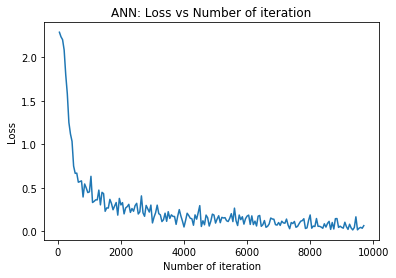

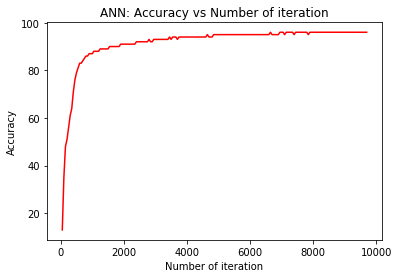

In [39]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

## CNN Model

In [41]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

In [47]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel,self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=0)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,stride=1,padding=0)
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
        
    def forward(self,x):
        out = self.cnn1(x)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.cnn2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create ANN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
        


In [53]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        count += 1
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.item(), accuracy))

Iteration: 500  Loss: 0.02072947472333908  Accuracy: 98 %
Iteration: 1000  Loss: 0.008310346864163876  Accuracy: 98 %
Iteration: 1500  Loss: 0.010440520942211151  Accuracy: 98 %
Iteration: 2000  Loss: 0.004580650478601456  Accuracy: 98 %


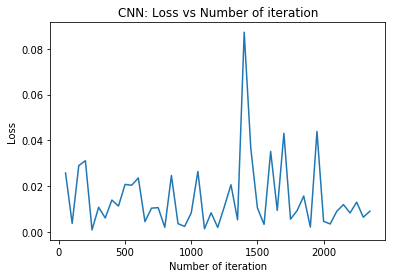

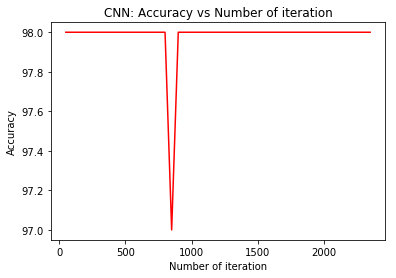

In [54]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()